In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from bs4 import BeautifulSoup

import re

In [4]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [5]:
# 전처리 리스트
li_brands = ['CU', 'GS25', 'GS수퍼마켓', '농협', '롯데마트', '롯데백화점', '롯데슈퍼', '세븐일레븐',
       '신세계백화점', '이마트', '현대백화점', '홈플러스']
li_groceries = ['소면','국수','만두','당면','두부','라면','밀가루','부침가루','빵','호떡','만쥬','스프','스페설K','콘푸로스트','콘푸라이트',
               '미역국','짜장','카레','오뚜기밥','찰진밥','햇반','우동','야채죽','단팥죽','쇠고기죽','초밥','칩포테이토','포카칩','자일리톨',
               '해태아이스쿨','돼지바','메로나','바밤바','새우깡','가나파이','몽쉘크림','초코파이','초콜렛','목캔디','아이비','참크래커',
               '마가린','7even','떠먹는불가리스','바이오거트','요플레','이오','불가리스','버터','앱솔루트','분유','프리미엄프레쉬','건강한햄',
               '비앤나','롯데햄','소시지','아메리칸후랑크','의성 마늘','우유','드빈치','치즈','슬라이스햄','샌드위치햄','김밥김','맛살',
               '꽁치','어묵','참치','고추장','간장','태양초골드','황도','된장','마요네즈','딸기잼','딸기쨈','설탕','벌꿀','꽃소금',
               '옥수수유','식용유','콩기름','식초','쌈장','참기름','케찹','해물','델몬트','오렌지','현미녹차','베지밀','두유','생막걸리',
               '우국생','HITE','오비골든라거','카스 프레쉬','비타500','비타파워','스프라이트','칠성사이터','삼다수','아이시스','워터라인',
               '참이슬','처음처럼','비락식혜','게토레이','파워에이드','포카리스웨트','순보리차','옥수수수염차','레쓰비','맥스웰 하우스',
               '맥심 티오피','칸타타','맥심모카골드','테이스터스초이스','프렌치까페','카페라떼','코카콜라','펩시콜라','카페오레','김치',
               '콩나물','단무지','월드콘','박카스','배추','부라보콘','구론산','스타벅스','양파','참붕어','몽쉘','칠성사이다','풀무원','스페셜K',
               '네스카페','오리온','감자','고구마','버섯','애호박','대파','막걸리','토스트','남양','당근','동서','마늘','시금치','엔젤리너스','오뚜기',
               '컨피던스','풋고추','샘표','오이','국내산','고등어','롯데','오징어','백설','삼립','씨그램','레드불','비비고','떡','몬스터','탄산수','청정원',
                '오리온','켈로그','팔도','하선정','해태','엔제리너스','스팸','들기름','트레비','굴소스','땅콩','아몬드','적상추','쪽파','생강','양반',
                '투게더','줄기 없는 무', '깻잎','가지', '카스','오비라거','자유시간','하이트','핫브레이크']

li_meat = ['삼겹살','쇠고기등심','쇠고기불고기','달걀','목초란','토종닭','알짜란','백숙','특란','갈치','삼치','참조기','건강란',
          '쇠고기 등심','쇠고기 불고기','돼지고기 목살','부세']

li_necessaries = ['페리오','핸드크림','니베아','해피바스','클링스','치약','2080','샴푸','하기스','면도날','3날','린스','컨디셔너',
                 '이자녹스 테르비나','iope 슈퍼바이탈','염색','미쟝센','비겐크림폼','선블럭','뉴트로지나','핸드워시','아이!깨끗해',
                 '비누','좋은느낌','화이트 New','위스퍼','바디피트','로션','Dr.','바디워시','온더바디','AVEENO','티슈','가그린','리스테린',
                 'TRY','BYC','호일','비비안','러닝','비너스','테크','크린','후레시지퍼백','참그린','지퍼락','롯데팩','후레쉬백',
                 '키친타올','홈스타','물먹는하마','물먹는 하마','깨끗한나라','항균트리오','페브리즈','비트','무균무때','옥시싹싹',
                 '샤프란','락스','피죤','다우니','맥스','가스','크린랩','듀라셀','마미손','위청수','타우스액','까스명수',
                 '데톨','후레쉬랩','화이트','향균트리오','데톨','메디안','롯데랩','메디안','벡셀','드봉 스위트로즈','도브','깨끗한 나라','P&G',
                  '퍼실','크리넥스','제이디','퍼펙트','에너자이저','닥터','생록천','쉐리','고무장갑','자연퐁','세이프',
                 '스파크','어드밴스 캐비티','알프스디','보솜이','표백제','세정제','팬티','컴배트',
                 '홈키파','에프킬라','임페리얼','챕스틱','클린앤클리어','오랄비','향균 트리오']



In [6]:
# 전처리 함수
def find_brand(x):
    global li_brands
    for bra in li_brands:
        if bra in x:
            return bra
    return np.nan

def find_brand2(x):
    global li_company
    for bra in li_company:
        if bra in x:
            return bra
    return np.nan

def categorization(x):
    global li_meat
    global li_groceries
    global li_necessaries
    global else_li
    if x == '무':
        return '식품'
    for meat in li_meat:
        if meat in x:
            return '축산물'
    for gro in li_groceries:
        if gro in x:
            return '식품'
    for nec in li_necessaries:
        if nec in x:
            return '생필품'
    return np.nan

def find_prod(x):
    global all_pro
    if x in all_pro:
        return x
    return np.nan


In [7]:
# 2014년부터 빠지지 않고 등장하는 상품
df_2014_1 = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/2014년 1월 가격데이터.csv', encoding='ansi')
all_pro = df_2014_1.상품명.unique()
for year in range(2014, 2022):
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/{}년 {}월 가격데이터.csv'.format(year,month), encoding='ansi')
        all_pro = np.intersect1d(all_pro, df.상품명.unique())
        print(year, end = ' ')
    print()
print('end')

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [8]:
# all_pro에 존재하는 품목만 남기고 전처리해서 저장
for year in range(2014, 2022):
    df_year = pd.DataFrame()
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/{}년 {}월 가격데이터.csv'.format(year,month), encoding='ansi')
        try:
            df.drop('제조사', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('세일여부', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('원 플러스 원', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('1+1', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('행사상품(1+1)', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('원플러스원', axis = 1, inplace=True)
        except:
            pass
        try:
            df.drop('세일여부 1+1', axis = 1, inplace=True)
        except:
            pass     
        
        df['브랜드'] = df['판매업소'].apply(find_brand)
        df['상품명'] = df['상품명'].apply(find_prod)
        df.dropna(how = 'any', inplace = True)
        df['상품명'] = df.상품명.astype('category')
        df['브랜드'] = df.브랜드.astype('category')
        df['분류'] = df.상품명.apply(categorization)
        df['분류'] = df.분류.astype('category')
        df['조사일'] = '{}-{}'.format(year,month)
# #         df['조사일'] = pd.to_datetime(df.조사일)
# #         df.set_index('브랜드', inplace = True)
#         grouped = df.groupby(['조사일','브랜드','분류']).판매가격.mean()
#         temp = grouped.unstack().reset_index()
#         temp.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 평균.csv'.format(year,month), encoding='ansi') 
        df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [9]:
# 각 브랜드 별 유지되는 상품 리스트
# 각 브랜드 별 상품
df_2014_1 = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
prod_bra = df_2014_1.groupby('브랜드')['상품명'].unique()
for year in range(2014, 2022):
    for month in range(1,13):
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        for bra in li_brands:
            try:
                prod_bra[bra] = np.intersect1d(prod_bra[bra], df.groupby('브랜드')['상품명'].unique()[bra])
            except:
                continue
        print(year, end = ' ')
    print()
print('end')


2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [11]:
prod_bra['CU']

array(['동원 꽁치', '롯데슬라이스햄', '리스테린 쿨민트', '매일 카페라떼 마일드',
       '매일우유 오리지널(ESL)(1000ml)', '백설 중력밀가루(1kg)', '삼다수(2L)', '삼다수(500ml)',
       '스타벅스 커피라떼', '아이시스(2L)', '악마의유혹 프렌치 카페오레', '알프스가스', '양반 구운 김밥김',
       '오뚜기황도', '옥수수 마가린(200g)', '옥수수수염차', '지퍼락 지퍼백(중)'], dtype=object)

In [12]:
li_company = prod_bra.index
li_company

Index(['CU', 'GS25', 'GS수퍼마켓', '농협', '롯데마트', '롯데백화점', '롯데슈퍼', '세븐일레븐',
       '신세계백화점', '이마트', '현대백화점', '홈플러스'],
      dtype='object', name='브랜드')

In [13]:
test = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
test

Unnamed: 0                   상품명     조사일  판매가격      판매업소    브랜드  분류
0               0   서울우유 체다슬라이스치즈(400g)  2014-1  6600    이마트양산점    이마트  식품
1               2                 오뚜기황도  2014-1  1630    이마트양산점    이마트  식품
2               4               백설국내콩기름  2014-1  4100    이마트양산점    이마트  식품
3              13           백설부침가루(1kg)  2014-1  2900  롯데백화점전주점  롯데백화점  식품
4              19                 오뚜기황도  2014-1  1800  롯데백화점전주점  롯데백화점  식품
...           ...                   ...     ...   ...       ...    ...  ..
41954      120426   서울우유 체다슬라이스치즈(200g)  2014-1  3600  현대백화점충청점  현대백화점  식품
41955      120428                 오뚜기황도  2014-1  1800  현대백화점충청점  현대백화점  식품
41956      120430               대상 사과식초  2014-1  2100  현대백화점충청점  현대백화점  식품
41957      120439              대림게맛살큰잔치  2014-1  3180  현대백화점충청점  현대백화점  식품
41958      120442  매일유업 뼈로가는 칼슘치즈(270g)  2014-1  6900  현대백화점충청점  현대백화점  식품

[41959 rows x 7 columns]

In [14]:
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로
# 최초 merge데이터 생성
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge['브랜드'] = df_merge.브랜드.apply(find_brand2)
df_merge['조사일'] = pd.to_datetime(df.조사일)
df.dropna(inplace = True)
df_merge.set_index('브랜드', inplace = True)
df_merge = df_merge.sort_values('상품명')

for bra in li_company:
    if bra in df_merge.index:
        df_merge.loc[bra,'상품명'] = df_merge.loc[bra,'상품명'].apply(lambda x: x if x in prod_bra[bra] else np.nan)
df_merge.dropna(inplace = True)

In [15]:
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로       
for year in range(2014, 2022):
    for month in range(1,13):
        if year == 2014 and month == 1:
            continue
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        df.drop('Unnamed: 0', axis = 1, inplace = True)
        df['브랜드'] = df.브랜드.apply(find_brand2)
        df['조사일'] = pd.to_datetime(df.조사일)
        df.dropna(inplace = True)
#         df = df.sort_values('조사일')
#         df = df.fillna(method='ffill')
        df.set_index('브랜드', inplace = True)
        df = df.sort_values('상품명')
        for bra in li_company:
            if bra in df.index.unique():
                df.loc[bra,'상품명'] = df.loc[bra,'상품명'].apply(lambda x: x if x in prod_bra[bra] else np.nan)
        df.dropna(inplace = True)
        df_merge = df_merge.append(df)
#         df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터-1.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
# df_merge.dropna()
df_merge.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge.csv'.format(year,month), encoding='ansi') 
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [221]:
df= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge.csv', encoding='ansi')

In [75]:
df

브랜드              상품명        조사일  판매가격        판매업소   분류
0        현대백화점           3M후레쉬백 2014-01-01  2300    현대백화점목동점  생필품
1        현대백화점           3M후레쉬백 2014-01-01  2300    현대백화점충청점  생필품
2        현대백화점           3M후레쉬백 2014-01-01  1900    현대백화점울산점  생필품
3        현대백화점           3M후레쉬백 2014-01-01  2300    현대백화점미아점  생필품
4        현대백화점           3M후레쉬백 2014-01-01  2300    현대백화점중동점  생필품
...        ...              ...        ...   ...         ...  ...
4852195  현대백화점  홈스타 제습과 방충을 한번에 2021-12-01  4500    현대백화점대구점  생필품
4852196  현대백화점  홈스타 제습과 방충을 한번에 2021-12-01  4500  현대백화점무역센터점  생필품
4852197  현대백화점  홈스타 제습과 방충을 한번에 2021-12-01  4500    현대백화점목동점  생필품
4852198  현대백화점  홈스타 제습과 방충을 한번에 2021-12-01  4500    현대백화점미아점  생필품
4852199  현대백화점  홈스타 제습과 방충을 한번에 2021-12-01  4500    현대백화점천호점  생필품

[4852200 rows x 6 columns]

In [222]:
df['상품명'] = df.상품명.astype('category')
df['브랜드'] = df.브랜드.astype('category')
df['분류'] = df.분류.astype('category')
df['조사일'] = pd.to_datetime(df['조사일'])

In [223]:
df.dropna(inplace= True)

In [224]:
df = df.sort_values('조사일')

In [225]:
df = df.set_index('브랜드')

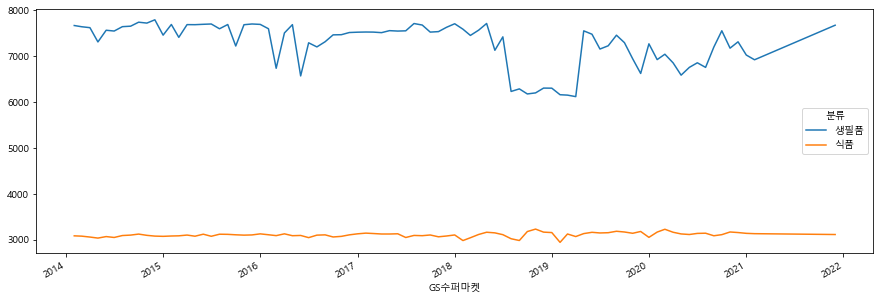

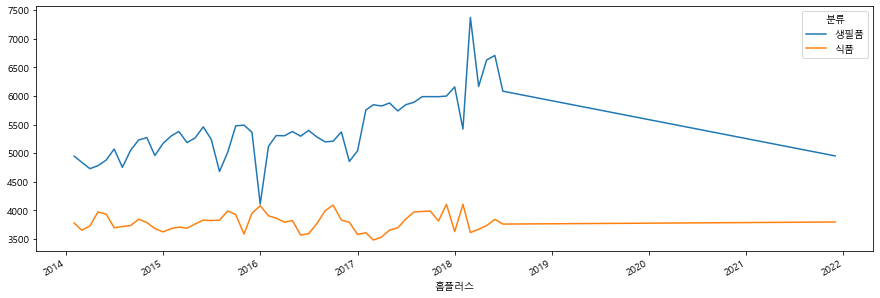

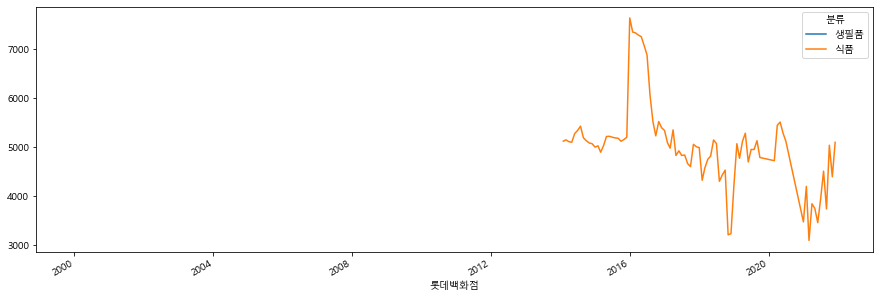

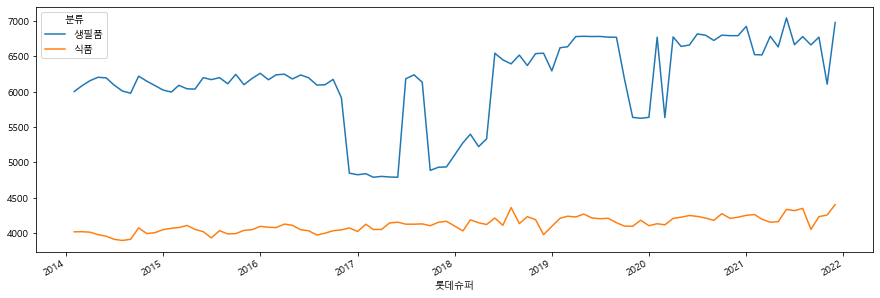

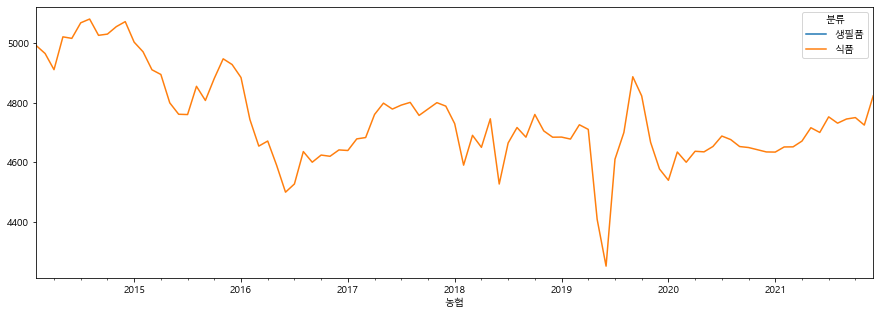

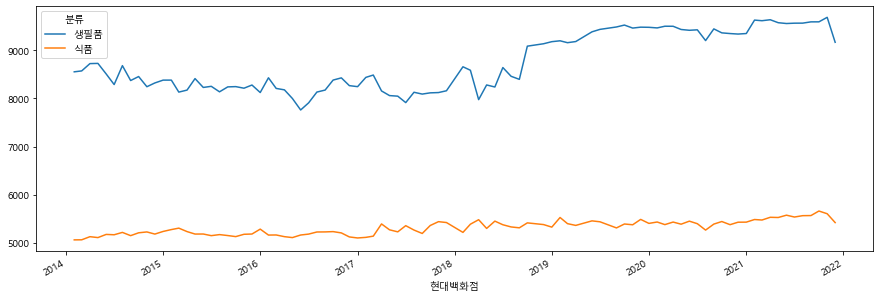

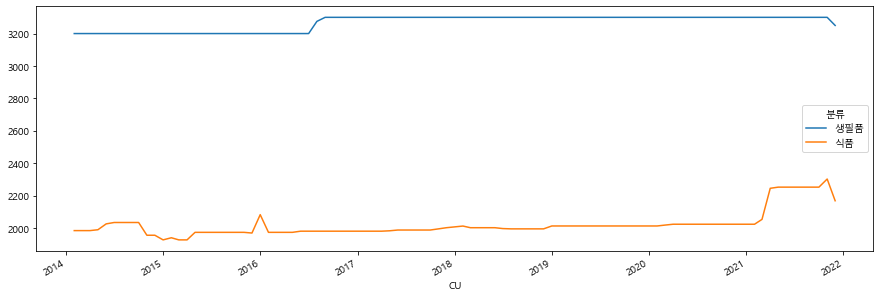

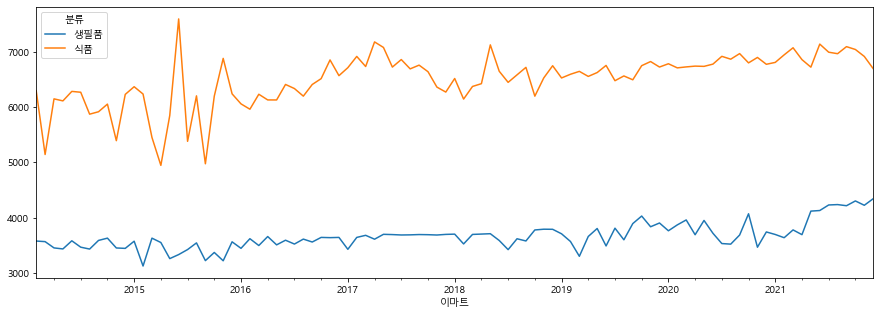

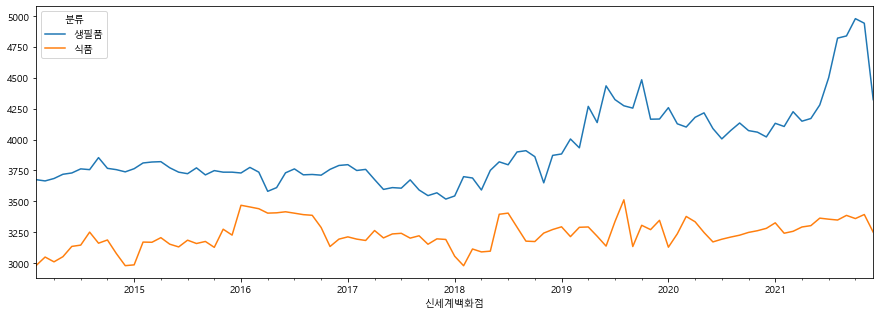

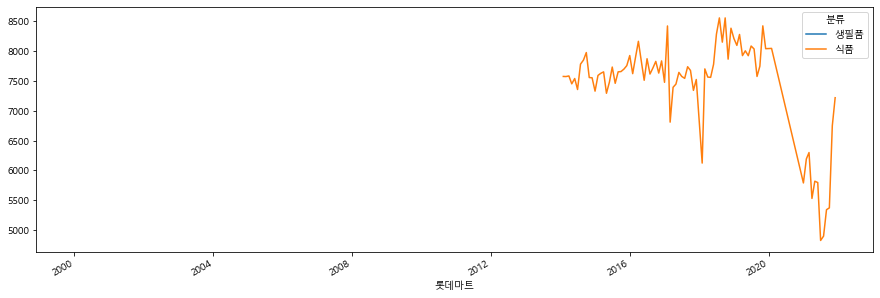

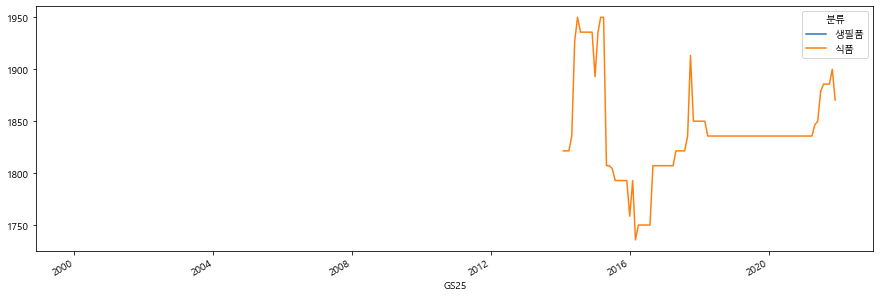

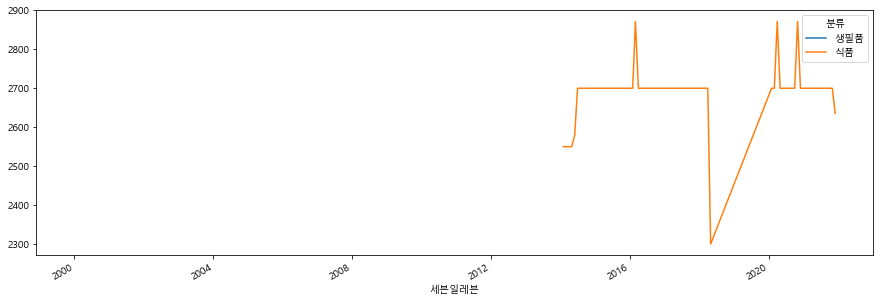

In [231]:
for idx in df.index.unique():
    df.loc[idx].groupby(['조사일','분류'])['판매가격'].mean().unstack().plot(figsize=(15,5), xlabel = idx)

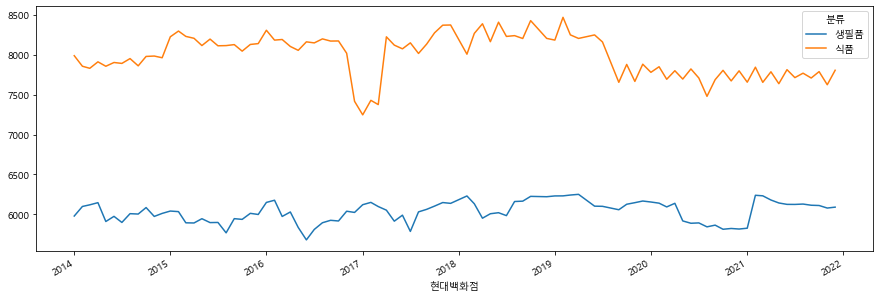

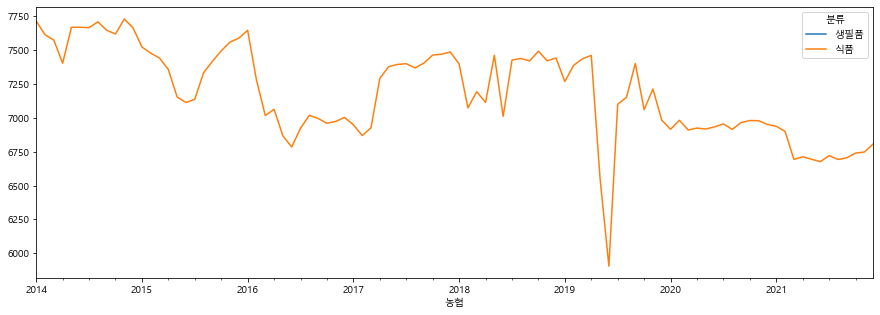

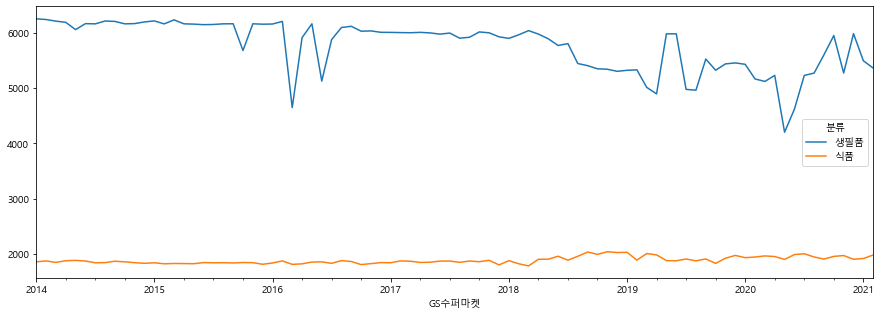

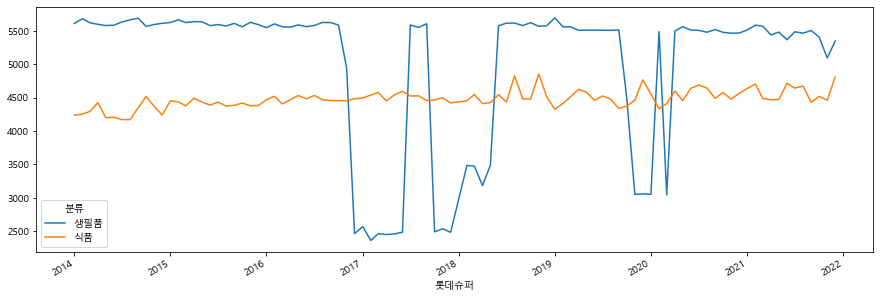

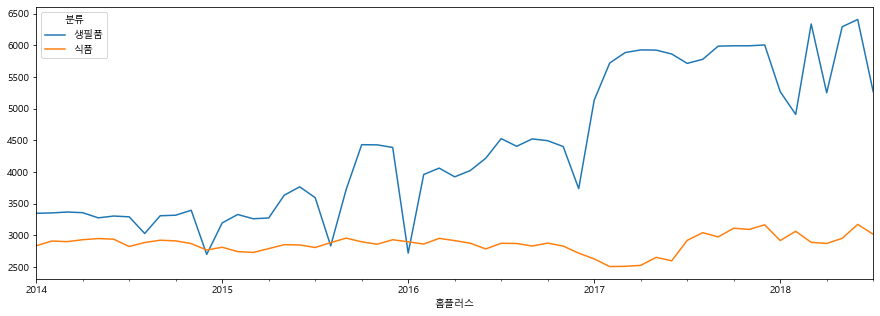

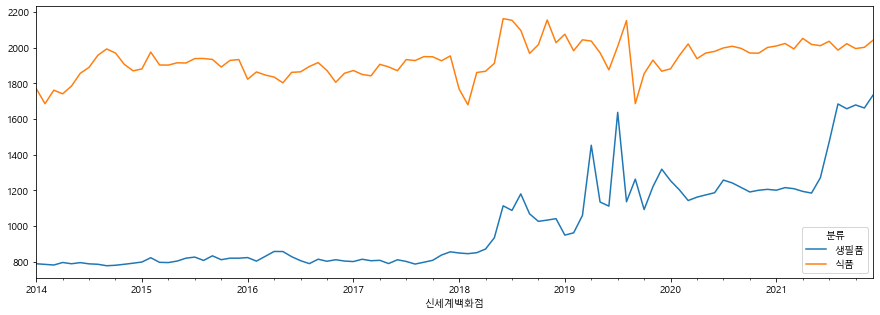

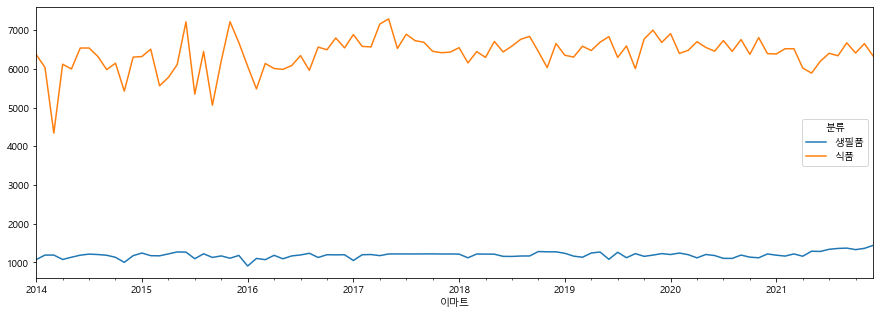

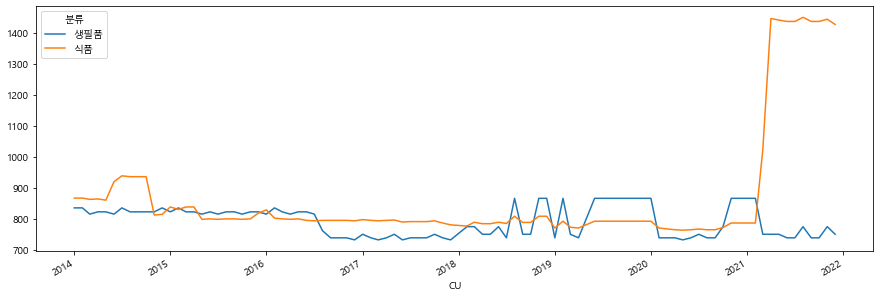

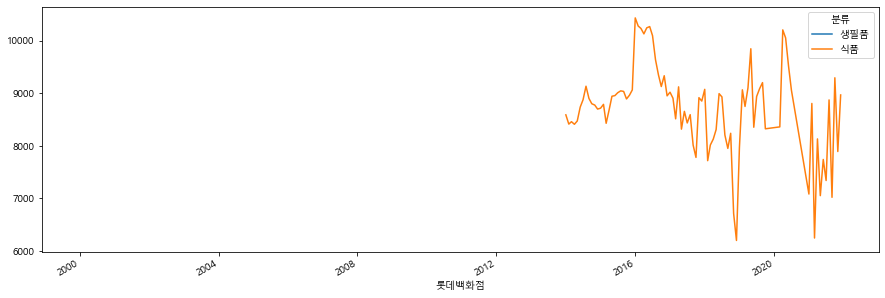

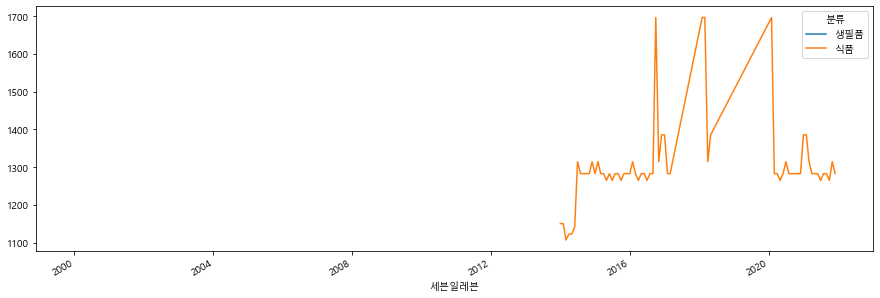

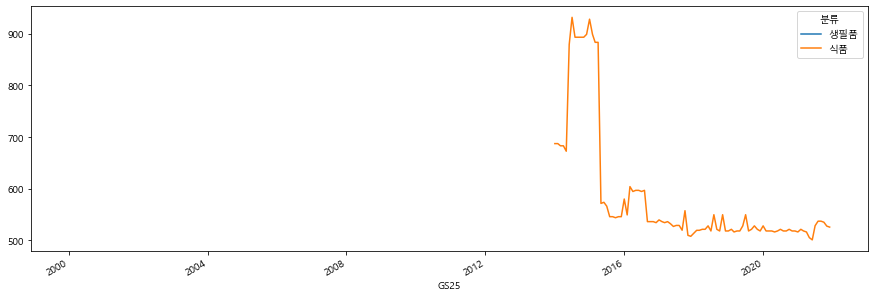

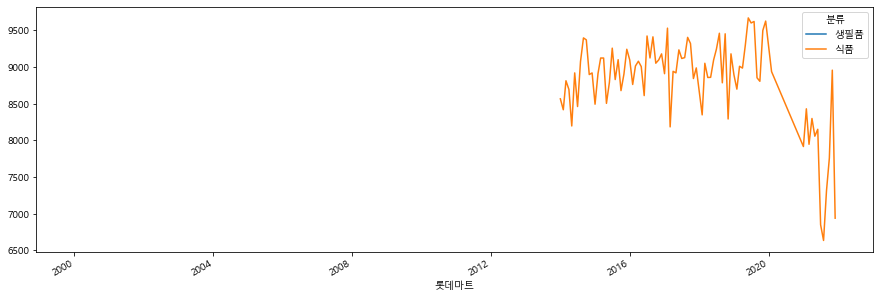

In [113]:
for idx in df.index.unique():
    df.loc[idx].groupby(['조사일','분류'])['판매가격'].std().unstack().plot(figsize=(15,5),xlabel = idx)

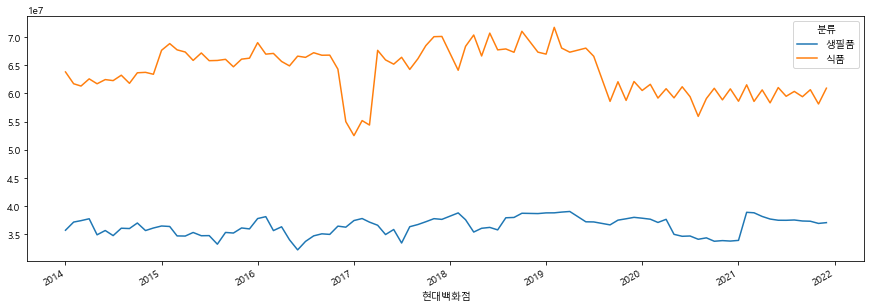

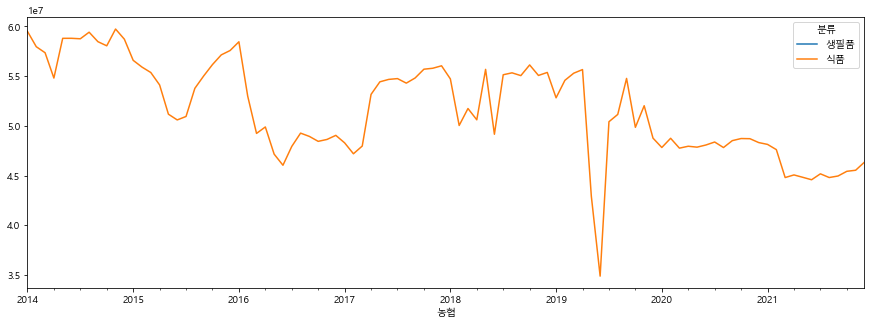

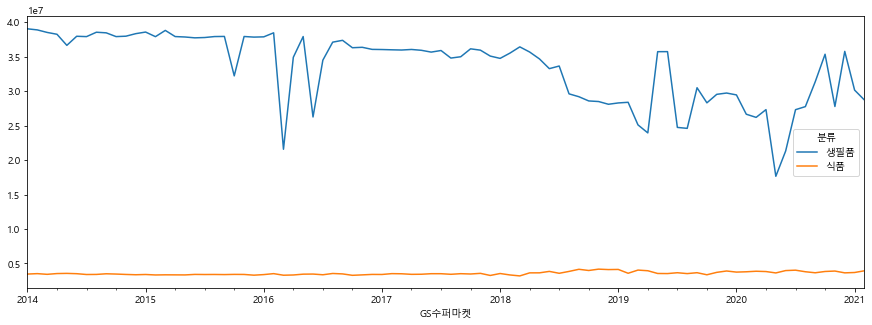

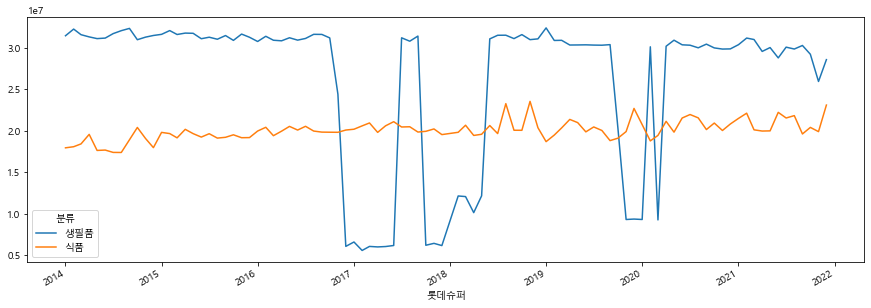

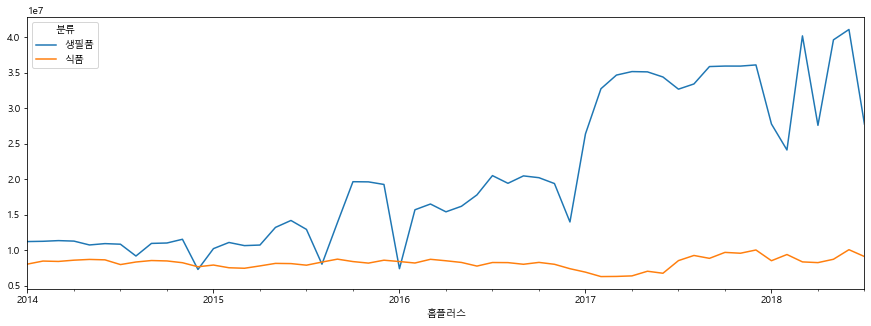

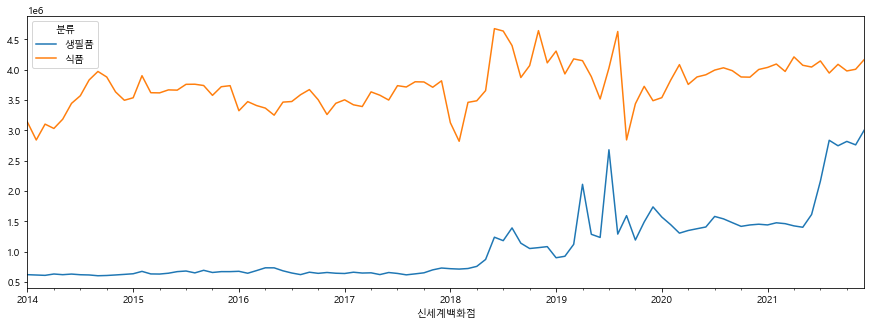

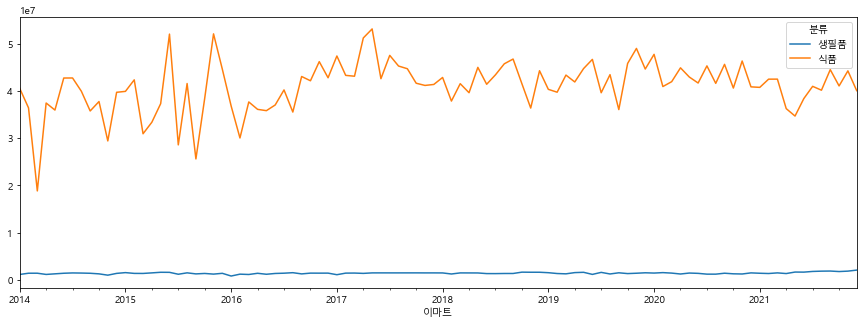

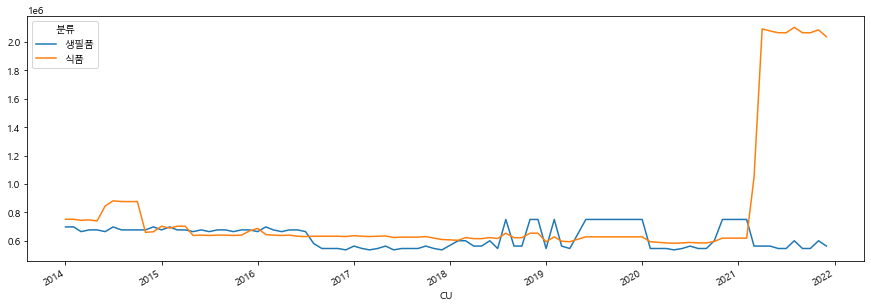

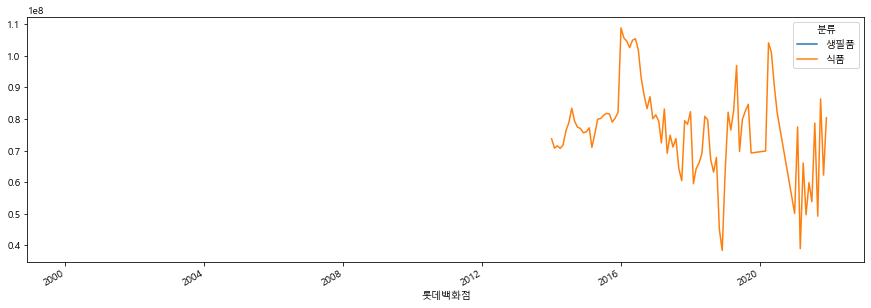

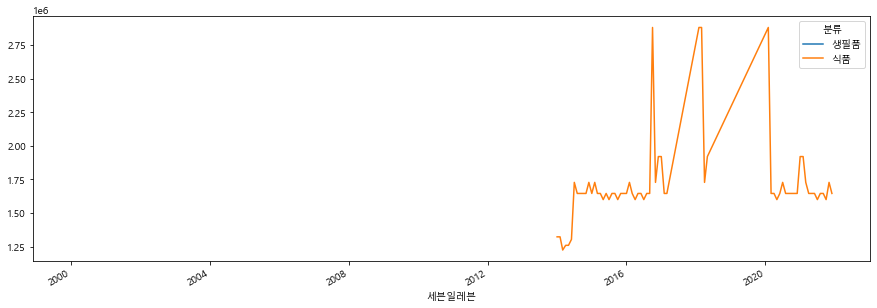

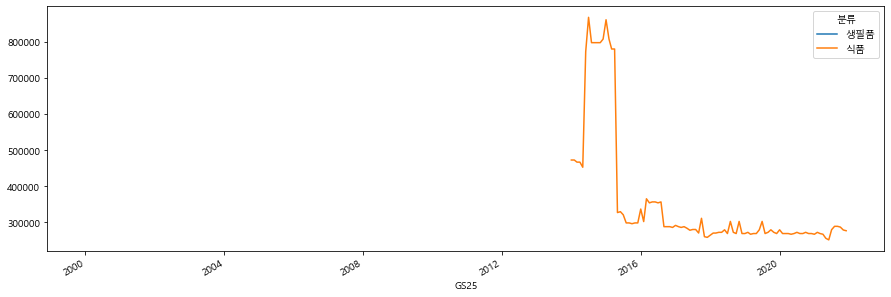

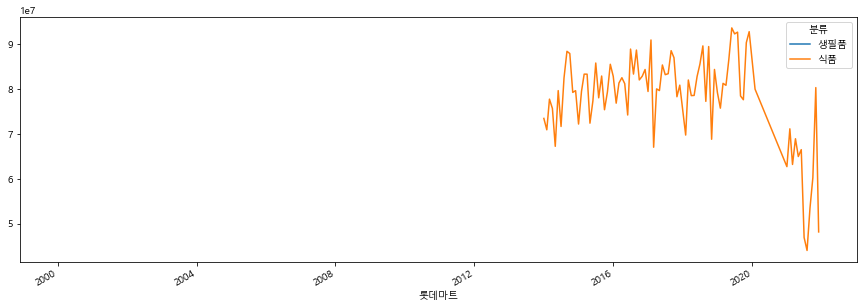

In [114]:
for idx in df.index.unique():
    df.loc[idx].groupby(['조사일','분류'])['판매가격'].var().unstack().plot(figsize=(15,5),xlabel = idx)

In [210]:
# 물가 지수 전처리
price_per = pd.read_excel(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/소비자물가상승률.xls')
price_per

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN    201401월    201402월    201403월    201404월    201405월   
2      소비자물가        1.1        1.0        1.3        1.5        1.7   
3       생활물가        0.6        0.4        0.8        1.0        1.4   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 87 Unnamed: 88  \
0        NaN        NaN        NaN        NaN  ...         NaN         NaN   
1    201406월    201407월    201408월    201409월  ...     202103월     202104월   
2        1.7        1.6        1.4        1.1  ...         1.9         2.5   
3        1.4        1.4        0.8        0.6  ...         2.1         3.1   

  Unnamed: 89 Unnamed: 90 Unnamed: 91 Unnamed: 92 Unnamed: 93 Unnamed: 94  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1     202105월     202106월     202107월     202108월     202109월     202110월   
2         2.6         2.3         2.6         2.6         2.4         3.2   
3         3.4         3.0         3.5         3.3         3.1         4.6   

  Unnamed: 95 Unnamed: 96  
0         NaN         NaN  
1     202111월     202112월  
2         3.8         3.7  
3         5.2         4.6  

[4 rows x 97 columns]

In [211]:
price_per.fillna(0, inplace = True)
price_per.iloc[1,1:] = price_per.iloc[1,1:].apply(lambda x : x[:4]+'-'+x[4:6])
price_per.iloc[1,1:] = pd.to_datetime(price_per.iloc[1,1:])
col = price_per.iloc[1,1:]
price_per.drop(0,inplace = True)
price_per.drop(1,inplace = True)
price_per = price_per.set_index('Unnamed: 0')
price_per.rename(columns=col, inplace = True)
price_per = price_per.astype('float')
price_per = price_per.T

<AxesSubplot:>

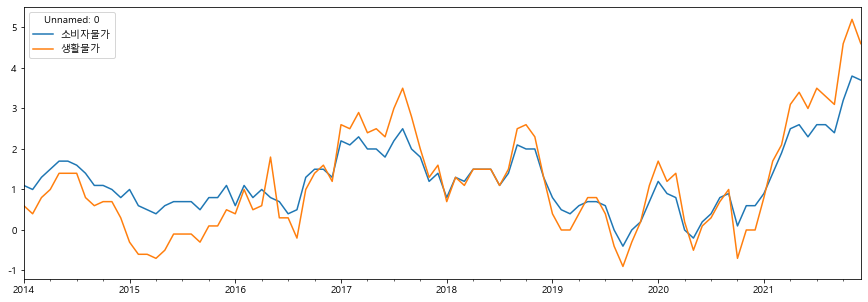

In [137]:
price_per.plot(figsize=(15,5)) 

In [ ]:
price_per = pd.read_excel(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터/소비자물가통계.xls')

price_per

price_per.iloc[1,1:] = price_per.iloc[1,1:].apply(lambda x : x[:4] + '-' + '01')

col = price_per.iloc[1,1:]
price_per.drop(0,inplace = True)
price_per.drop(1,inplace = True)

price_per = price_per.set_index('Unnamed: 0')
price_per.rename(columns=col, inplace = True)

price_per

price_per = price_per.astype('float')

<AxesSubplot:>

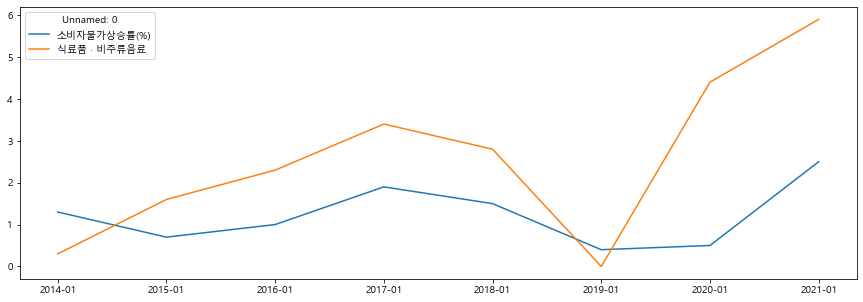

In [17]:
price_per.T.plot(figsize = (15,5)) 

In [18]:
for idx in df.index.unique():
    dis = pd.concat([df.loc[idx].groupby(['조사일','분류'])['판매가격'].std().unstack(),price_per],axis = 1)
    print(idx)
    print('=' * 50)
    display(dis.corr())
#     try:
#         display(sns.heatmap(dis.corr(),cmap='RdBu_r'))
#     except:
#         pass

ParserError: Unknown string format: 소비자물가상승률(%)

In [ ]:
# # 자산 버블 
# 물가는 공급량과 유통의 마진에 따라 조절됨
# 대형마트의 품목 가격만으로 물가를 설명하기 부족함
# 중국산 상품들이 대량으로 들어오는 등의 외부의 요소도 있음
# 품목별 전체평균으로 해볼 필요가 있음

# # 온라인/오프라인
# 상품코드가 있으면 매칭해서 뽑을 수 있는데 상품명만으로는 어렵다 
# 다른 방식 고려, 
# 결국에는 데이터 문제로 수렴 
# 우리가 필요한 데이터를 가공할 수 있느냐의 문제, 데이터로 해결이 안되면 주제를 변경해야 함   
# finance는 종목코드가 있다.
# 다나와가 가능한 이유는 상품 코드를 활용하기 때문일 것 (상세페이지-상품코드)
# 상품명과 제품코드를 매칭해서 가격 비교를 한다던지..


In [25]:
prod_bra

브랜드
CU        [동원 꽁치, 롯데슬라이스햄, 리스테린 쿨민트, 매일 카페라떼 마일드, 매일우유 오...
GS25      [롯데슬라이스햄, 매일 카페라떼 마일드, 스타벅스 커피라떼, 악마의유혹 프렌치 카페...
GS수퍼마켓    [CJ 참그린 , Dr. ato(민감성건성피부보습), 대림게맛살큰잔치, 델몬트 스카...
농협        [CJ 더 건강한햄 그릴후랑크(350g), 고소한국산콩두부(부침용)(대상), 달콤한...
롯데마트      [맥심모카골드, 백설 중력밀가루(1kg), 켈로그 콘푸로스트(600g), 프레시안삼...
롯데백화점     [롯데슬라이스햄, 맥심모카골드, 백설 중력밀가루(1kg), 백설국내콩기름, 삼다수(...
롯데슈퍼      [Dr. ato(민감성건성피부보습), 달콤한 베지밀 비, 달콤한 삼육두유 B, 대림...
세븐일레븐                                 [롯데슬라이스햄, 칩포테이토 오리지날]
신세계백화점    [대상 사과식초, 동원 꽁치, 동원참치 라이트스탠다드(묶음), 리스테린 쿨민트, 매...
이마트       [대한웰빙호일 15m*25m, 맑고신선한옥수수유, 맥심모카골드, 무가염버터(450g...
현대백화점     [3M후레쉬백, CJ 더 건강한햄 그릴후랑크(350g), CJ 참그린 , I can...
홈플러스      [달콤한 베지밀 비, 대상 사과식초, 동원참치 라이트스탠다드(묶음), 마하3 면도날...
Name: 상품명, dtype: object

In [179]:
c = prod_bra

In [180]:
c = c.drop('이마트')
# c = c.drop('신세계백화점')
c = c.drop('세븐일레븐')
c = c.drop('롯데마트')
c = c.drop('농협')
c = c.drop('GS수퍼마켓')
c = c.drop('GS25')
c = c.drop('CU')

In [181]:
d = c[-1]
for i in c[-1:0:-1]:
    d = np.intersect1d(d,i)
    print(d)

['달콤한 베지밀 비' '대상 사과식초' '동원참치 라이트스탠다드(묶음)' '마하3 면도날' '매일유업 뼈로가는 칼슘치즈(270g)'
 '무균무때(욕실용)' '백설부침가루(1kg)' '비타파워' '사조 꽁치' '삼다수(2L)' '삼다수(500ml)'
 '서울우유 체다슬라이스치즈(400g)' '아이비' '알뜨랑비누 핑크' '오뚜기 꽁치' '옥수수 마가린(200g)' '옥수수수염차'
 '자연의 시작 불가리스 사과 (4개묶음)' '칩포테이토 오리지날' '켈로그 콘푸로스트(600g)'
 '쿠킹호일(20cm x 30m)(삼아)' '쿠킹호일(25cm x 30m)(삼아)' '크린백' '포스트 콘푸라이트(600g)']
['달콤한 베지밀 비' '대상 사과식초' '마하3 면도날' '매일유업 뼈로가는 칼슘치즈(270g)' '무균무때(욕실용)'
 '백설부침가루(1kg)' '사조 꽁치' '삼다수(2L)' '삼다수(500ml)' '서울우유 체다슬라이스치즈(400g)' '아이비'
 '오뚜기 꽁치' '옥수수 마가린(200g)' '옥수수수염차' '자연의 시작 불가리스 사과 (4개묶음)' '칩포테이토 오리지날'
 '켈로그 콘푸로스트(600g)' '크린백' '포스트 콘푸라이트(600g)']
['대상 사과식초' '백설부침가루(1kg)' '삼다수(500ml)' '서울우유 체다슬라이스치즈(400g)' '오뚜기 꽁치'
 '자연의 시작 불가리스 사과 (4개묶음)' '크린백']
['백설부침가루(1kg)' '삼다수(500ml)' '서울우유 체다슬라이스치즈(400g)' '크린백']


In [184]:
li_company2 = c.index

In [185]:
def find_brand3(x):
    global li_company2
    for bra in li_company2:
        if bra in x:
            return bra
    return np.nan

In [186]:
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge['브랜드'] = df_merge.브랜드.apply(find_brand3)

In [187]:
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로
# 최초 merge데이터 생성
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge['브랜드'] = df_merge.브랜드.apply(find_brand3)
df_merge['조사일'] = pd.to_datetime(df_merge.조사일)
df_merge.dropna(inplace = True)
df_merge.set_index('브랜드', inplace = True)
df_merge = df_merge.sort_values('상품명')

for bra in li_company2:
    if bra in df_merge.index:
        df_merge.loc[bra,'상품명'] = df_merge.loc[bra,'상품명'].apply(lambda x: x if x in d else np.nan)
df_merge.dropna(inplace = True)
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로       
for year in range(2014, 2022):
    for month in range(1,13):
        if year == 2014 and month == 1:
            continue
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        df.drop('Unnamed: 0', axis = 1, inplace = True)
        df['브랜드'] = df.브랜드.apply(find_brand3)
        df['조사일'] = pd.to_datetime(df.조사일)
        df.dropna(inplace = True)
#         df = df.sort_values('조사일')
#         df = df.fillna(method='ffill')
        df.set_index('브랜드', inplace = True)
        df = df.sort_values('상품명')
        for bra in li_company2:
            if bra in df.index.unique():
                df.loc[bra,'상품명'] = df.loc[bra,'상품명'].apply(lambda x: x if x in d else np.nan)
        df.dropna(inplace = True)
        df_merge = df_merge.append(df)
#         df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터-1.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
# df_merge.dropna()
df_merge.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge1.csv'.format(year,month), encoding='ansi') 
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [188]:
df= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge1.csv', encoding='ansi')

In [189]:
df['상품명'] = df.상품명.astype('category')
df['브랜드'] = df.브랜드.astype('category')
df['분류'] = df.분류.astype('category')
df['조사일'] = pd.to_datetime(df['조사일'])

In [190]:
df = df.set_index('상품명')

In [192]:
df

브랜드        조사일  판매가격            판매업소   분류
상품명                                                      
백설부침가루(1kg)    롯데슈퍼 2014-01-01  1980         롯데슈퍼송파점   식품
백설부침가루(1kg)    홈플러스 2014-01-01  2270       홈플러스센텀시티점   식품
백설부침가루(1kg)    홈플러스 2014-01-01  2600  홈플러스익스프레스 신정2점   식품
백설부침가루(1kg)   현대백화점 2014-01-01  2890        현대백화점천호점   식품
백설부침가루(1kg)  신세계백화점 2014-01-01  2900       신세계백화점강남점   식품
...             ...        ...   ...             ...  ...
크린백            롯데슈퍼 2021-12-01  2990        롯데슈퍼G방배점  생필품
크린백            롯데슈퍼 2021-12-01  2990        롯데슈퍼G목동점  생필품
크린백            롯데슈퍼 2021-12-01  2990      롯데슈퍼G속초조양점  생필품
크린백            롯데슈퍼 2021-12-01  2990      롯데슈퍼G고양삼송점  생필품
크린백            롯데슈퍼 2021-12-01  2990        롯데슈퍼G강서점  생필품

[356451 rows x 5 columns]

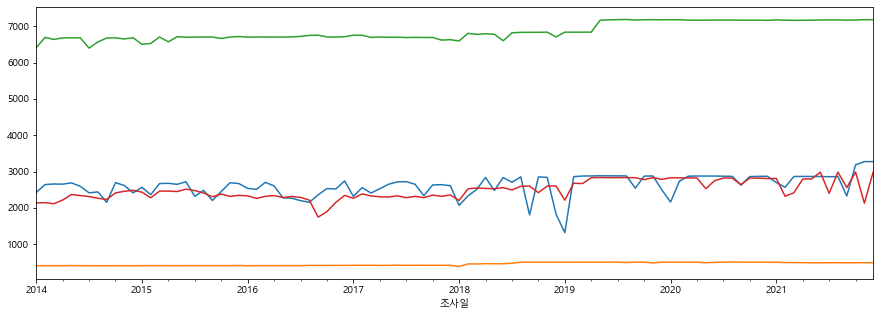

In [217]:
for idx in df.index.unique():
    df.loc[idx].groupby(['조사일'])['판매가격'].mean().plot(figsize=(15,5))

In [213]:
for idx in df.index.unique():
    dis = pd.concat([df.loc[idx].groupby(['조사일'])['판매가격'].mean(),price_per],axis = 1)
    print(idx)
    print('=' * 50)
    display(dis.corr())

백설부침가루(1kg)


판매가격     소비자물가      생활물가
판매가격   1.000000  0.155221  0.197546
소비자물가  0.155221  1.000000  0.950653
생활물가   0.197546  0.950653  1.000000

삼다수(500ml)


판매가격     소비자물가      생활물가
판매가격   1.000000 -0.024332  0.136228
소비자물가 -0.024332  1.000000  0.950653
생활물가   0.136228  0.950653  1.000000

서울우유 체다슬라이스치즈(400g)


판매가격     소비자물가      생활물가
판매가격   1.000000  0.000079  0.173233
소비자물가  0.000079  1.000000  0.950653
생활물가   0.173233  0.950653  1.000000

크린백


판매가격     소비자물가      생활물가
판매가격   1.000000 -0.118702  0.007927
소비자물가 -0.118702  1.000000  0.950653
생활물가   0.007927  0.950653  1.000000

In [ ]:
for idx in df.index.unique():
    dis = pd.concat([df.loc[idx].groupby(['조사일','분류'])['판매가격'].std().unstack(),price_per],axis = 1)
    print(idx)
    print('=' * 50)
    display(dis.corr())

In [60]:
a = prod_bra
a = a.drop('농협')
a = a.drop('롯데마트')
a = a.drop('롯데백화점')
a = a.drop('롯데슈퍼')
a = a.drop('세븐일레븐')
a = a.drop('신세계백화점')
a = a.drop('이마트')

In [64]:
b = a[0]
for i in a[1:]:
    b = np.intersect1d(b,i)
    print(b)

['롯데슬라이스햄' '매일 카페라떼 마일드' '스타벅스 커피라떼' '악마의유혹 프렌치 카페오레' '옥수수 마가린(200g)'
 '옥수수수염차']
['롯데슬라이스햄' '매일 카페라떼 마일드' '악마의유혹 프렌치 카페오레' '옥수수 마가린(200g)' '옥수수수염차']
['롯데슬라이스햄' '매일 카페라떼 마일드' '악마의유혹 프렌치 카페오레' '옥수수 마가린(200g)' '옥수수수염차']
['옥수수 마가린(200g)' '옥수수수염차']


In [69]:
li_company2 = a.index

In [71]:
def find_brand3(x):
    global li_company2
    for bra in li_company2:
        if bra in x:
            return bra
    return np.nan

In [78]:
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge['브랜드'] = df_merge.브랜드.apply(find_brand3)

In [91]:
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로
# 최초 merge데이터 생성
df_merge= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/2014년1월 데이터.csv', encoding='ansi')
df_merge.drop('Unnamed: 0', axis = 1, inplace = True)
df_merge['브랜드'] = df_merge.브랜드.apply(find_brand3)
df_merge['조사일'] = pd.to_datetime(df_merge.조사일)
df_merge.dropna(inplace = True)
df_merge.set_index('브랜드', inplace = True)
df_merge = df_merge.sort_values('상품명')

for bra in li_company2:
    if bra in df_merge.index:
        df_merge.loc[bra,'상품명'] = df_merge.loc[bra,'상품명'].apply(lambda x: x if x in b else np.nan)
df_merge.dropna(inplace = True)
# 각 브랜드 별 유지되는 상품이 아니면 nan값으로       
for year in range(2014, 2022):
    for month in range(1,13):
        if year == 2014 and month == 1:
            continue
        df = pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터.csv'.format(year,month), encoding='ansi')
        df.drop('Unnamed: 0', axis = 1, inplace = True)
        df['브랜드'] = df.브랜드.apply(find_brand3)
        df['조사일'] = pd.to_datetime(df.조사일)
        df.dropna(inplace = True)
#         df = df.sort_values('조사일')
#         df = df.fillna(method='ffill')
        df.set_index('브랜드', inplace = True)
        df = df.sort_values('상품명')
        for bra in li_company2:
            if bra in df.index.unique():
                df.loc[bra,'상품명'] = df.loc[bra,'상품명'].apply(lambda x: x if x in b else np.nan)
        df.dropna(inplace = True)
        df_merge = df_merge.append(df)
#         df.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/{}년{}월 데이터-1.csv'.format(year,month), encoding='ansi')
        print(year, end = ' ')
    print()
# df_merge.dropna()
df_merge.to_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge1.csv'.format(year,month), encoding='ansi') 
print('end')
        

2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 
2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 
2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 
2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 
2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 
2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 
2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 
2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 
end


In [107]:
df= pd.read_csv(r'C:\Users\bitcamp\Desktop\2022년 1월 가격데이터\저장/데이터-merge1.csv', encoding='ansi')

In [108]:
df['상품명'] = df.상품명.astype('category')
df['브랜드'] = df.브랜드.astype('category')
df['분류'] = df.분류.astype('category')
df['조사일'] = pd.to_datetime(df['조사일'])

In [96]:
df = df.set_index('브랜드')

In [109]:
df = df.set_index('상품명')

In [110]:
df 

브랜드        조사일  판매가격           판매업소  분류
상품명                                                      
옥수수 마가린(200g)    홈플러스 2014-01-01  1570     홈플러스 전주완산점  식품
옥수수 마가린(200g)   현대백화점 2014-01-01  2000       현대백화점목동점  식품
옥수수 마가린(200g)  GS수퍼마켓 2014-01-01  1980   GS수퍼마켓 성동옥수점  식품
옥수수 마가린(200g)    홈플러스 2014-01-01  2050  홈플러스익스프레스 봉천점  식품
옥수수 마가린(200g)  GS수퍼마켓 2014-01-01  1980   GS수퍼마켓 창원팔용점  식품
...               ...        ...   ...            ...  ..
옥수수수염차          현대백화점 2021-12-01  1300       현대백화점미아점  식품
옥수수수염차          현대백화점 2021-12-01  1300       현대백화점중동점  식품
옥수수수염차          현대백화점 2021-12-01  1300       현대백화점천호점  식품
옥수수수염차          현대백화점 2021-12-01  1300       현대백화점판교점  식품
옥수수수염차          현대백화점 2021-12-01  1300     현대백화점무역센터점  식품

[88870 rows x 5 columns]

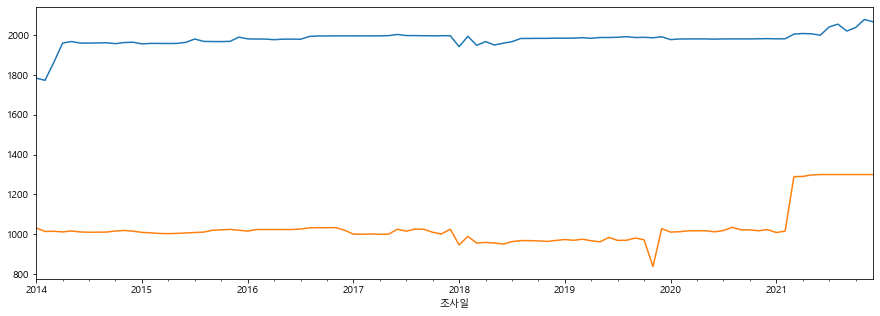

In [113]:
for idx in df.index.unique():
    df.loc[idx].groupby(['조사일'])['판매가격'].mean().plot(figsize=(15,5))